### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 5


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ву Ньят Нам
##### Группа:   НПИбд-01-17


## Москва 2020
***

### Вариант № 14


Communities and Crime Data Set  

Название файла: communities.data 

Ссылка: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime 

Первый признак: population (столбец No 6) 

Второй признак: ViolentCrimesPerPop (столбец No 128)  

Третий признак: NumUnderPov (столбец No 33) 

Класс: LemasGangUnitDeploy (столбец No 125) 

 

1.	Считайте из заданного набора данных репозитария UCI значения трех признаков и метки класса. 

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data", sep=',', header=None, usecols=(39),dtype=str)
data = data[(data.T != '?').all()]
data

,5,32,124,127
0,0.19,0.08,0.5,0.2
16,0.15,0.15,0.5,0.49
20,0.25,0.19,0.5,0.34
21,1,0.76,0,0.69
23,0.11,0.1,1,0.63
...,...,...,...,...
1969,1,0.82,0.5,0.75
1981,0.07,0.02,0,0.07
1991,0.16,0.12,0,0.23
1992,0.08,0.03,0,0.19


2.	Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения для того класса, к которому относится запись с пропущенным значением.

In [3]:
data.isnull().sum().value_counts()

0    4
dtype: int64

3. Масштабируйте признаки набора данных на интервал от $0$ до $1$.

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(data[[5,127,32]])

4.	Визуализируйте набор данных в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

<Figure size 432x288 with 0 Axes>

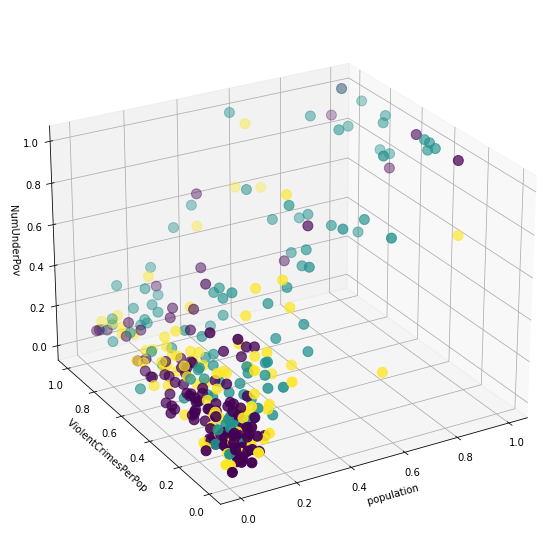

In [5]:
fig = plt.figure()
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
ax.scatter( xs, ys, zs, c=data[124].astype(float).values,s=100)
ax.set_xlabel('population ')
ax.set_ylabel('ViolentCrimesPerPop ')
ax.set_zlabel('NumUnderPov')
ax.view_init( azim=-120, elev=25)
plt.show()

5.	Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью наивного байесовского классификатора.

In [6]:
y = data[124].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

nbc = GaussianNB()
nbc.fit(X_train,y_train);
y_pred = nbc.predict(X_test)

6. Постройте и выведите на экран отчет о классификации и матрицу ошибок.

In [7]:
print(classification_report(y_test,y_pred));
print(confusion_matrix(y_test,y_pred));

              precision    recall  f1-score   support

           0       0.42      0.76      0.54        29
         0.5       0.64      0.36      0.46        25
           1       0.23      0.12      0.15        26

    accuracy                           0.42        80
   macro avg       0.43      0.41      0.38        80
weighted avg       0.43      0.42      0.39        80

[[22  3  4]
 [10  9  6]
 [21  2  3]]


7. Найдите точность классификации набора данных при помощи наивного байесовского классификатора методом кросс-валидации по 5 блокам. 

In [8]:
kfold = KFold(n_splits=5)
results = cross_val_score(nbc, X, data[124].values, cv=kfold)
print(results.mean()*100.0)

47.93650793650793


8.	Используя разделение набора данных из трех признаков на обучающую и тестовую выборки в соотношении 75% на 25%, проведите классификацию тестовой выборки с помощью метода К ближайших соседей для различных значений К и определите оптимальное значение параметра К с минимальной долей ошибок.  

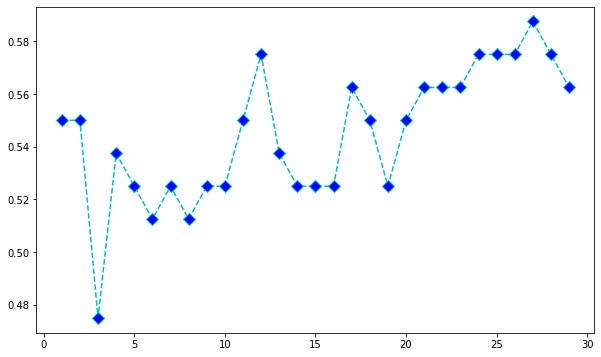

In [9]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='c', linestyle='dashed', marker='D',
         markerfacecolor='blue', markersize=8)

9. Найдите точность классификации набора данных при помощи метода К ближайших соседей для найденного значения К методом кросс-валидации по 5 блокам.

In [10]:
knn = KNeighborsClassifier(n_neighbors=2)
kfold = KFold(n_splits=5)
results = cross_val_score(knn, X, data[124].values, cv=kfold)
print("Точность: {:.3f} ({:.3f})".format(results.mean()*100.0, results.std()*100.0))

Точность: 47.956 (2.410)


10. Определите, какой из методов классификации позволяет получить более высокую точность классификации набора данных при кросс-валидации по 5 блокам.

## Метод классификация K ближайщих соседей получается более высокую точность классификации набора данных при кросс-валидации по 5 блокам потому что

In [11]:
print ('47.956 > 47.93650793650793')

47.956 > 47.93650793650793


11.	Проведите классификацию точек набора данных лучшим методом и визуализируйте тестовую выборку в виде точек пространства с координатами, соответствующими трем признакам, отображая точки различных прогнозируемых классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

In [12]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

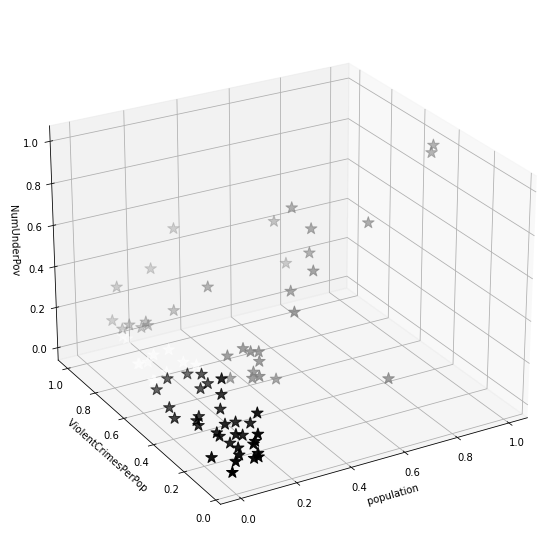

In [13]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')

ax.scatter( X_test[:,0], X_test[:,1], X_test[:,2], c=knn.predict(X_test),s=150, marker='*')
ax.set_xlabel('population ')
ax.set_ylabel('ViolentCrimesPerPop ')
ax.set_zlabel('NumUnderPov')
ax.view_init( azim=-120, elev=25)
plt.show()